In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Load input data
X = pd.read_csv('data/train/X_Train_Data_Input.csv')

# Load target data
Y = pd.read_csv('data/train/Y_Train_Data_Target.csv')

# Display the first few rows to verify the contents
X.head()
Y.head()


x = X.iloc[:,1:]
y = Y.iloc[:,1:]

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
x.head()
print("No.of rows : ",x.shape[0])
print("No.of Columns : ",x.shape[1])

No.of rows :  785133
No.of Columns :  22


In [5]:
#checking each row is aligned correctly with corresponding id
are_ids_aligned = X['ID'].equals(Y['ID'])
if are_ids_aligned:
    print(x.describe())


             Column0        Column1        Column2        Column3  \
count  785124.000000  785133.000000  785133.000000  658830.000000   
mean        0.440757    1321.788614    2951.279411      -0.000210   
std         1.163275     907.267965    2143.140140       0.999935   
min         0.000000   -1080.000000     -47.000000      -2.028572   
25%         0.000000     515.000000    1129.000000      -0.675216   
50%         0.000000    1173.000000    2709.000000       0.678139   
75%         0.000000    2435.000000    4472.000000       0.678139   
max        18.000000    2499.000000   10290.000000       0.678139   

             Column4        Column5        Column6        Column7  \
count  657423.000000  617953.000000  781283.000000  785133.000000   
mean       -0.000855      -0.000367      -0.000709       0.000727   
std         1.000350       1.015255       0.998984       1.045883   
min        -1.855728      -0.007469      -0.407939      -0.015607   
25%        -0.577162      -0.0074

In [6]:

total = x.isnull().sum().sort_values(ascending=False)

percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)

null_percent_table = pd.concat([total,percent],axis=1,keys=['Total','Percent'])

null_percent_table

,Total,Percent
Column9,732137,0.932501
Column14,365703,0.465785
Column5,167180,0.212932
Column4,127710,0.162660
Column3,126303,0.160868
Column15,16456,0.020960
Column8,3850,0.004904
Column6,3850,0.004904
Column0,9,0.000011
Column1,0,0.000000


In [7]:
#applying imputation to generate values for null values using the algorithms Using LightGBM
xdata = x.copy()
xdata.isnull().sum().sort_values(ascending=False)

#importing lightGBM imputation function to impute the missing values
import algorithm_scripts.null_imputation as nm
xdata_imputed = nm.lightgbm_impute(xdata)
print(xdata_imputed.isnull().sum())

xdata_imputed.head(5)


Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,0.434190,-0.015603,0.606265,-0.080668,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,1.554998,-0.015574,0.329946,-0.084515,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,-0.075830,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,0.0,211,59.0,-0.331445,-1.772447,-0.004521,-0.407939,-0.015607,-0.774979,0.003409,...,0,0,0.001366,0.00339,0.0,0,1.0,0,0,0
4,0.0,718,950.0,-2.028572,-1.855728,-0.002390,-0.407939,-0.015607,-0.774979,-0.006882,...,0,0,0.001366,0.00339,0.0,0,0.0,0,0,0


In [8]:
xdata_imputed.describe()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,...,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440756,1321.788614,2951.279411,-0.030936,-0.228912,-0.000272,0.002669,0.000727,0.000216,-0.044919,...,0.363122,0.328285,-0.020393,-0.000994,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163269,907.267965,2143.140140,0.921001,1.076321,0.902915,1.002354,1.045883,1.054701,0.335876,...,0.480900,0.469589,1.504466,1.270585,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-2.028572,-2.343848,-3.019422,-0.506345,-0.015607,-1.053866,-6.682686,...,0.000000,0.000000,-832.749615,-1091.545904,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.358397,-1.474327,-0.007469,-0.407939,-0.015607,-0.774979,-0.084320,...,0.000000,0.000000,0.001350,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.452580,0.488309,-0.007468,-0.407939,-0.015607,0.119580,-0.071855,...,0.000000,0.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.365872,-0.015607,0.624394,-0.016041,...,1.000000,1.000000,0.001351,0.003390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,10290.000000,0.678139,0.701403,551.421127,14.985817,201.687947,323.992484,133.911803,...,1.000000,1.000000,13.338412,7.964745,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'Column0'}>,
        <Axes: title={'center': 'Column1'}>,
        <Axes: title={'center': 'Column2'}>,
        <Axes: title={'center': 'Column3'}>,
        <Axes: title={'center': 'Column4'}>],
       [<Axes: title={'center': 'Column5'}>,
        <Axes: title={'center': 'Column6'}>,
        <Axes: title={'center': 'Column7'}>,
        <Axes: title={'center': 'Column8'}>,
        <Axes: title={'center': 'Column9'}>],
       [<Axes: title={'center': 'Column10'}>,
        <Axes: title={'center': 'Column11'}>,
        <Axes: title={'center': 'Column12'}>,
        <Axes: title={'center': 'Column13'}>,
        <Axes: title={'center': 'Column14'}>],
       [<Axes: title={'center': 'Column15'}>,
        <Axes: title={'center': 'Column16'}>,
        <Axes: title={'center': 'Column17'}>,
        <Axes: title={'center': 'Column18'}>,
        <Axes: title={'center': 'Column19'}>],
       [<Axes: title={'center': 'Column20'}>,
        <Axes: title={'center': 'Column2

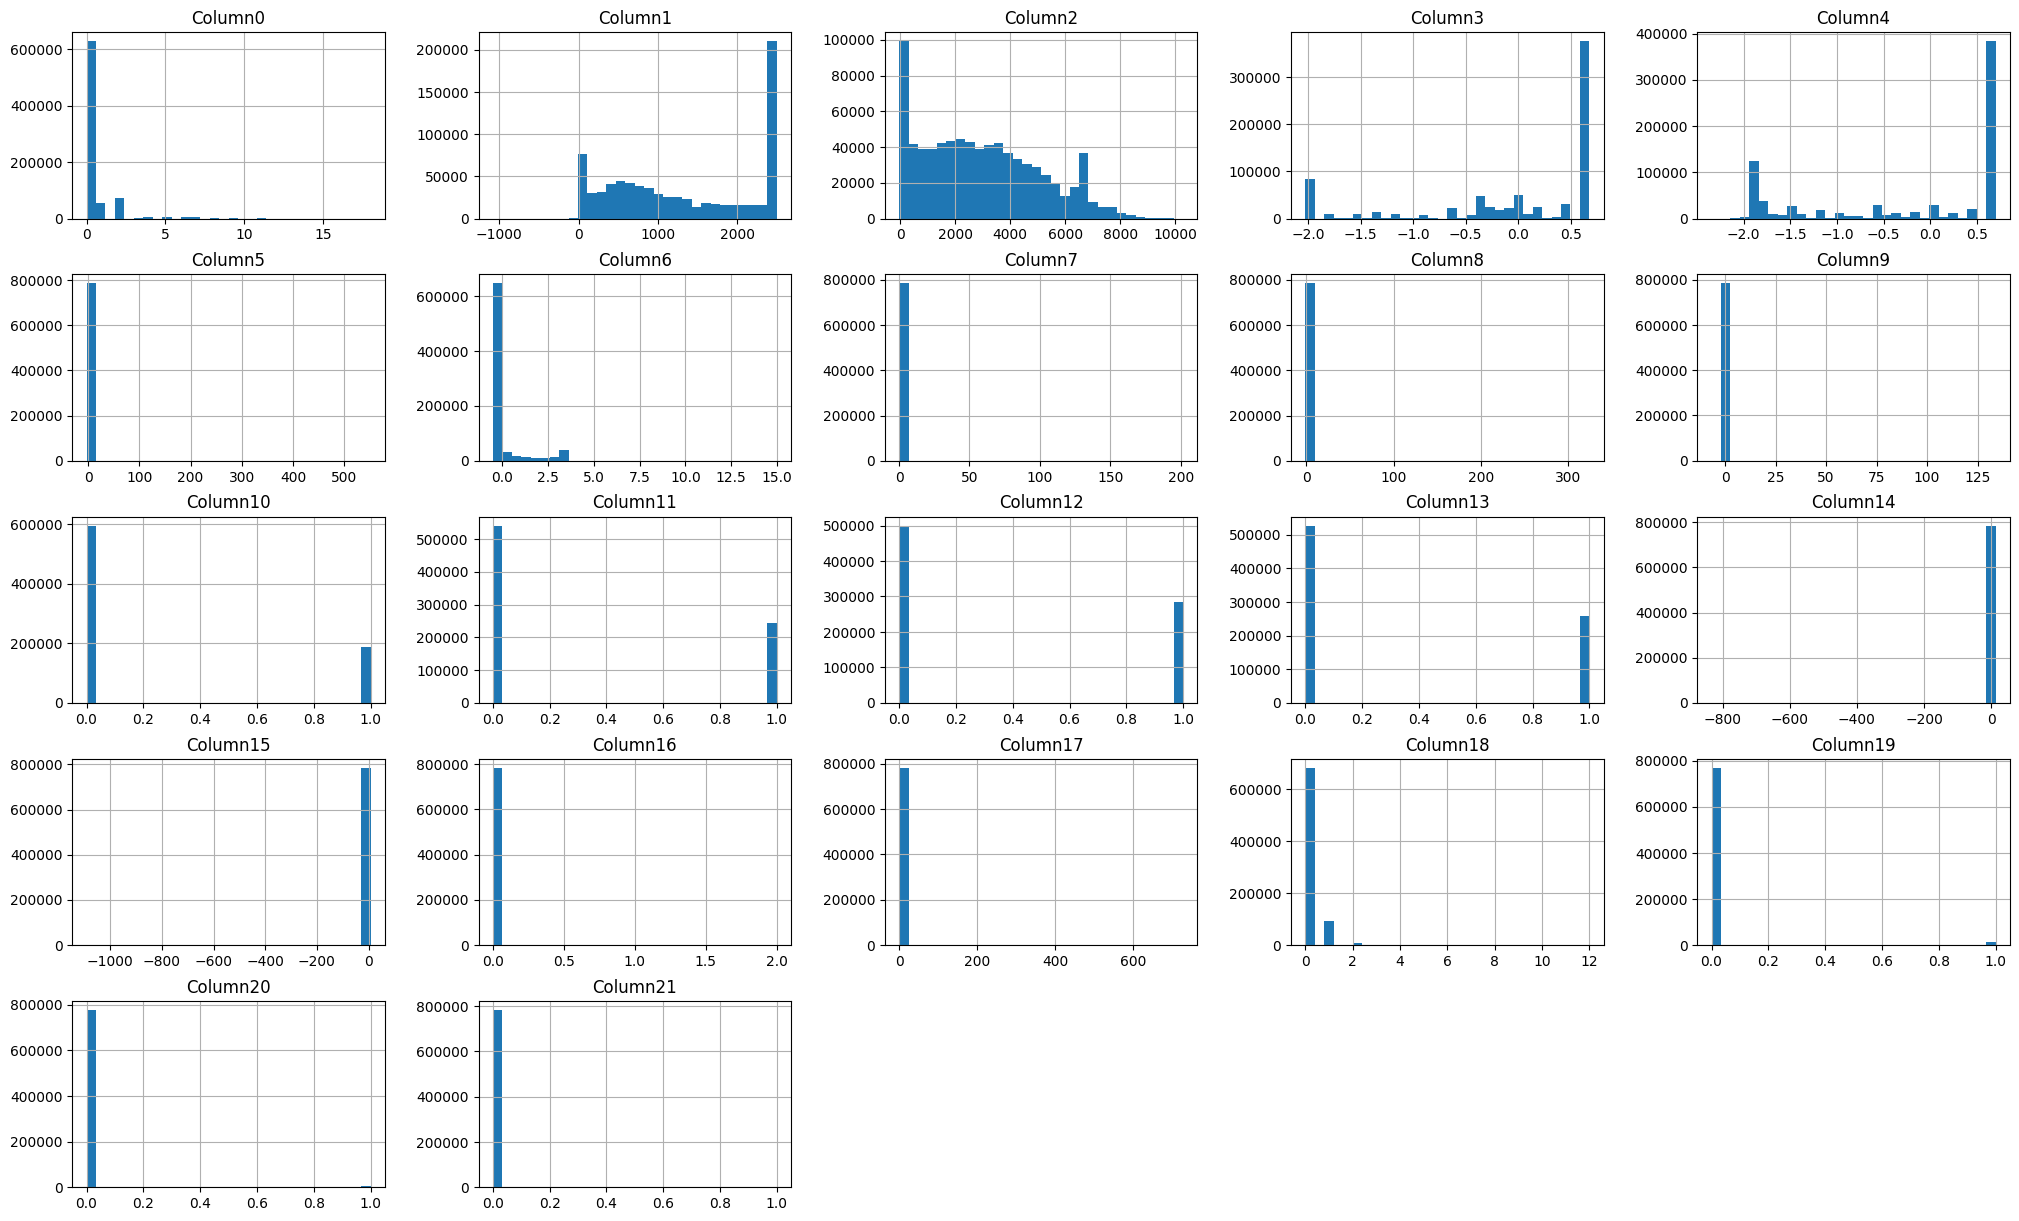

In [9]:
#analyzing or visualizing feature distribution
xdata_imputed.hist(bins=30,figsize=(25,15))



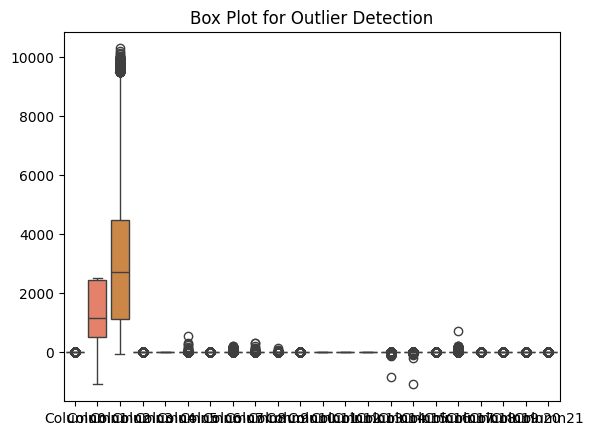

In [10]:


sns.boxplot(data=xdata_imputed)
plt.title('Box Plot for Outlier Detection')
plt.show()


In [11]:
#checkig the outliers
from algorithm_scripts.outlier_detection import IQR

outliers = IQR(xdata_imputed)
outliers.sum().sum()

np.int64(1410891)

In [12]:

from algorithm_scripts.outlier_detection import iqrImpute
imputed_data = iqrImpute(xdata_imputed)
imputed_data.describe()


,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
count,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,7.851330e+05,785133.000000,785133.000000,...,785133.000000,785133.000000,7.851330e+05,7.851330e+05,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000,785133.000000
mean,0.440756,1321.788614,2951.218823,-0.018451,-0.228912,-0.007468,-0.381847,-1.560727e-02,-0.006126,-0.054409,...,0.363122,0.328285,1.350576e-03,3.390099e-03,0.001206,0.270092,0.147856,0.018759,0.009351,0.002757
std,1.163269,907.267965,2142.950569,0.894229,1.076321,0.000001,0.044476,2.619500e-07,0.797814,0.044935,...,0.480900,0.469589,2.087830e-07,3.903130e-18,0.034855,3.128214,0.430530,0.135671,0.096249,0.052439
min,0.000000,-1080.000000,-47.000000,-1.913201,-2.343848,-0.007470,-0.471040,-1.560743e-02,-1.053866,-0.186738,...,0.000000,0.000000,1.350075e-03,3.390099e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,515.000000,1129.000000,-0.358397,-1.474327,-0.007469,-0.407939,-1.560743e-02,-0.774979,-0.084320,...,0.000000,0.000000,1.350394e-03,3.390099e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,2709.000000,0.452580,0.488309,-0.007468,-0.407939,-1.560743e-02,0.119580,-0.071855,...,0.000000,0.000000,1.350606e-03,3.390099e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2435.000000,4472.000000,0.678139,0.701403,-0.007468,-0.365872,-1.560717e-02,0.624394,-0.016041,...,1.000000,1.000000,1.350607e-03,3.390099e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.000000,2499.000000,9486.500000,0.678139,0.701403,-0.007466,-0.302770,-1.560679e-02,2.723453,0.086377,...,1.000000,1.000000,1.350926e-03,3.390099e-03,2.000000,728.000000,12.000000,1.000000,1.000000,1.000000


In [13]:
xdata_imputed = imputed_data
xdata_imputed.head()


,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,2.0,2495,3726.0,0.678139,0.701403,-0.007468,-0.302770,-0.015607,0.606265,-0.080668,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
1,0.0,2495,3454.0,0.452580,0.701403,-0.007468,-0.302770,-0.015607,0.329946,-0.084515,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0
2,2.0,2495,4543.0,-1.577453,-1.429540,-0.007469,-0.407939,-0.015607,-0.774979,-0.075830,...,1,1,0.001351,0.00339,0.0,0,0.0,0,0,0
3,0.0,211,59.0,-0.331445,-1.772447,-0.007466,-0.407939,-0.015607,-0.774979,0.003409,...,0,0,0.001351,0.00339,0.0,0,1.0,0,0,0
4,0.0,718,950.0,-1.913201,-1.855728,-0.007466,-0.407939,-0.015607,-0.774979,-0.006882,...,0,0,0.001351,0.00339,0.0,0,0.0,0,0,0


<Axes: >

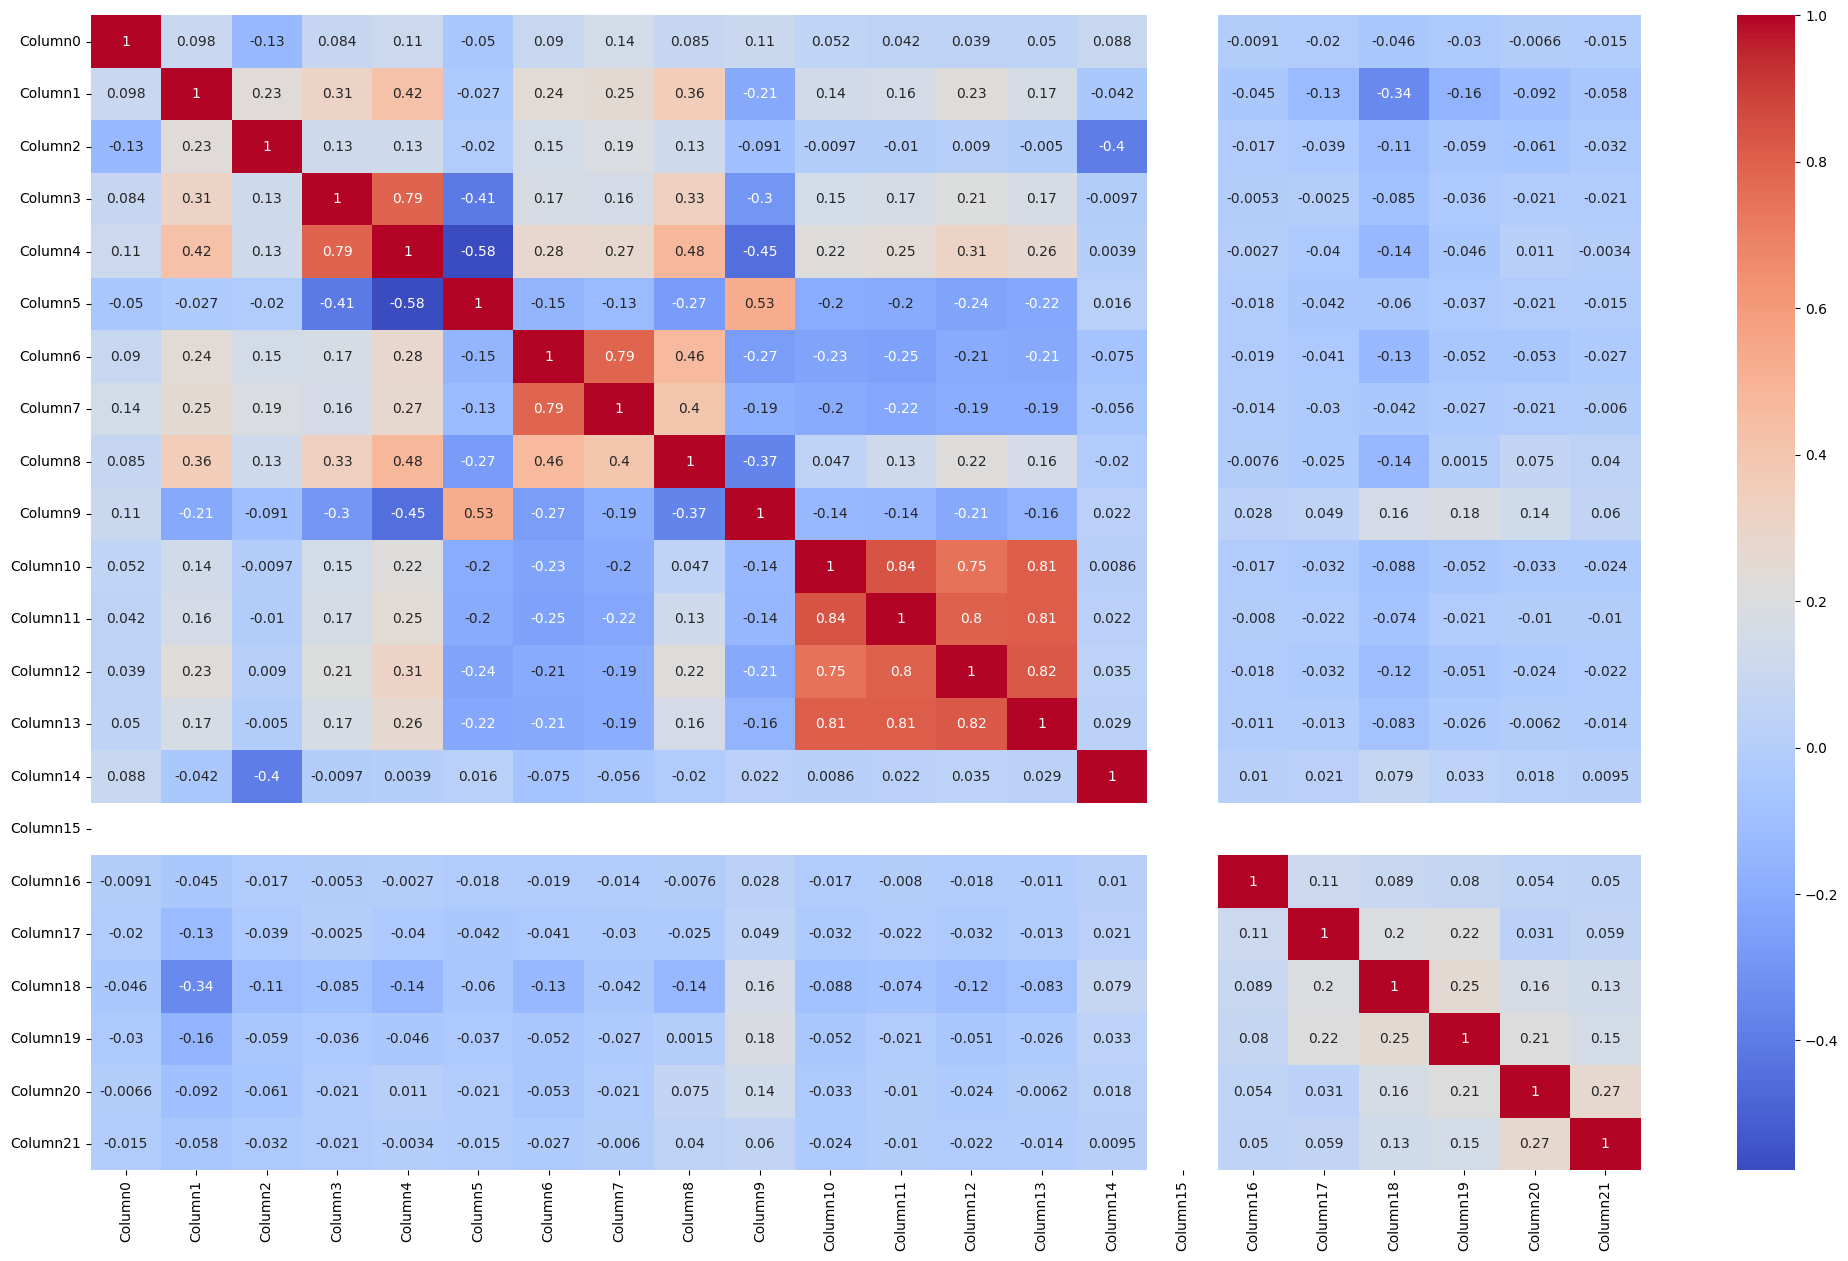

In [14]:
#doing correlation analysis 
corr_marix = xdata_imputed.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_marix,annot=True,cmap='coolwarm')

In [15]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(xdata_imputed)
xdata_imputed = pd.DataFrame(data_scaled,columns=xdata_imputed.columns)
xdata_imputed.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,...,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21
0,1.340399,1.293126,0.361549,0.778985,0.864347,-0.114928,1.777951,1.818141,0.767587,-0.584379,...,-0.755089,-0.699089,0.140442,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584
1,-0.378894,1.293126,0.234621,0.526746,0.864347,-0.089408,1.777951,1.818141,0.421242,-0.670005,...,-0.755089,-0.699089,0.140409,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584
2,1.340399,1.293126,0.742799,-1.743404,-1.115493,-0.807423,-0.586652,-0.599859,-0.963699,-0.476711,...,1.324347,1.430433,0.059373,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584
3,-0.378894,-1.224323,-1.349644,-0.350016,-1.434085,1.783629,-0.586652,-0.599859,-0.963699,1.286701,...,-0.755089,-0.699089,1.677765,3.903128e-18,-0.034605,-0.086341,1.979292,-0.138265,-0.097157,-0.052584
4,-0.378894,-0.665502,-0.933862,-2.118865,-1.511461,1.783629,-0.586652,-0.599859,-0.963699,1.057694,...,-0.755089,-0.699089,1.677765,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584


In [16]:
#Performig pca on correlated columns
correlated_cols = xdata_imputed[['Column10','Column11','Column12','Column13']]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
uncor_cols = pca.fit_transform(correlated_cols)

variance = pca.explained_variance_ratio_
variance

uncor_cols = pd.DataFrame(uncor_cols,columns=['PCA_1','PCA_2'])
xdata_imputed = xdata_imputed.drop(correlated_cols,axis=1)


In [17]:
xdata_imputed.head()
xdata_imputed = pd.concat([xdata_imputed,uncor_cols],axis=1)
xdata_imputed.head()

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,PCA_1,PCA_2
0,1.340399,1.293126,0.361549,0.778985,0.864347,-0.114928,1.777951,1.818141,0.767587,-0.584379,0.140442,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584,-1.343825,-0.136808
1,-0.378894,1.293126,0.234621,0.526746,0.864347,-0.089408,1.777951,1.818141,0.421242,-0.670005,0.140409,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584,-1.343825,-0.136808
2,1.340399,1.293126,0.742799,-1.743404,-1.115493,-0.807423,-0.586652,-0.599859,-0.963699,-0.476711,0.059373,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584,3.010724,-0.299542
3,-0.378894,-1.224323,-1.349644,-0.350016,-1.434085,1.783629,-0.586652,-0.599859,-0.963699,1.286701,1.677765,3.903128e-18,-0.034605,-0.086341,1.979292,-0.138265,-0.097157,-0.052584,-1.343825,-0.136808
4,-0.378894,-0.665502,-0.933862,-2.118865,-1.511461,1.783629,-0.586652,-0.599859,-0.963699,1.057694,1.677765,3.903128e-18,-0.034605,-0.086341,-0.343429,-0.138265,-0.097157,-0.052584,-1.343825,-0.136808


In [18]:
# #now checking for balancing or imbalancinfg the dataset
class_distribution = y.value_counts()
class_distribution
from algorithm_scripts.balancing_dataset import smote

balanced_data = smote(xdata_imputed,y)
x_balanced = balanced_data[0]
y_balanced = balanced_data[1]



In [19]:
xdata_imputed = iqrImpute(x_balanced)
y = y_balanced


In [20]:

x_train = xdata_imputed
y_train = y
print(x_train.shape)
print(y_train.shape)

(1422200, 20)
(1422200, 1)


In [22]:
#cleanign the test data set 
# Load input data
X_test = pd.read_csv('data/test/X_Test_Data_Input.csv')

# Load target data
Y_test = pd.read_csv('data/test/Y_Test_Data_Target.csv')

x_test = X_test.iloc[:,1:]
y_test = Y_test.iloc[:,1:]
x_test.isnull().sum()

Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

In [23]:
#cleanig test data set
from algorithm_scripts.null_imputation import iterative_impute

x_test = iterative_impute(x_test)

#checking for outliers
# sns.boxplot(data=x_test)
# plt.title('Box Plot for Outlier Detection')
# plt.show()

from algorithm_scripts.outlier_detection import IQR,iqrImpute

outliers_test = IQR(x_test)
outliers_test.sum().sum()



np.int64(461930)

In [26]:
x_test = iqrImpute(x_test)
outliers_test = IQR(x_test)
outliers_test.sum().sum()

np.int64(163199)